## Import the required libraries


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from matplotlib.pylab import plt
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

import warnings 
warnings.filterwarnings('ignore')


## Importing the Dataset


Read the dataset into pandas dataframe:


In [2]:
data = pd.read_csv('../data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1. About the Data


**Dataset** 
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Objective of Notebook:**  
This notebook aims to train at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. One of the models will be selected as a final model that best fits our needs in terms of accuracy and explainability.

**Data Set Description**  
There are 21 variables in this data set:
- 3 categorical variables (waterfront, view, condition),
- 16 continuous variables,
- 1 variable to store house ID (Id)
- 1 variable to store date house sold (date)

According to the output below, we have **21613 entries**, 0 to 21612, as well as **21 features**. The "Non-Null Count" column shows the number of non-null entries. In this dataset there is no null entry.  
Our target or response variable is 'price' and the rest of the features are our predictor variables.

We also have a mix of numerical (20 int64 or float64) and 1 object data type. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The `describe()` function reveals the statistical information about the numeric attributes.

For the "bedrooms", "sqft_living", "sqft_above", "sqft_basement", "sqft_living15" and "sqft_lot15" features, there is a big difference between the 75th percentile and the max value. This could indicate there may be some outliers and/or the data is not normally distributed. Will check for that in the next sections.  


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The `value_counts()` method is used to check the frequency of each value.

In this dataset, 'condition' feature has type int64 but it has only 5 values so we can treat it like a categorical feature. The same for "view" and "grade".

In [5]:
print(data['condition'].value_counts())
print(data['view'].value_counts())
print(data['grade'].value_counts())

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64
view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64


# 2. Data Cleaning and Wrangling


Here, we will check if we have any missing values.  
From the output below we don't have any missing value.

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function and search by the 'Id' column, which contains a unique index number for each entry.

In [7]:
duplicated = data[data.duplicated(['id'])]
duplicated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [8]:
data.drop_duplicates(['id'], inplace=True)
data.index.is_unique

True

Correlations

In [9]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num_corr = data_num.corr()['price']
top_features = data_num_corr.sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are correlated values with price:\n{}".format(top_features))

There are correlated values with price:
price            1.000000
sqft_living      0.701993
grade            0.667496
sqft_above       0.605495
sqft_living15    0.584688
bathrooms        0.525453
view             0.396933
sqft_basement    0.323552
bedrooms         0.309007
lat              0.306057
waterfront       0.266961
floors           0.256278
yr_renovated     0.127002
sqft_lot         0.088895
sqft_lot15       0.082038
yr_built         0.052967
condition        0.035089
long             0.020571
id              -0.018514
zipcode         -0.052171
Name: price, dtype: float64


Converting categorical variables to dummies  

In [10]:
data = pd.get_dummies(data, columns=['condition', 'view', 'grade'], drop_first=True)

Log transforming skew variables

In [11]:
# Create a list of colums to check for skewing
skew_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
       'zipcode', 'lat', 'sqft_living15',
       'sqft_lot15']

skew_vals = data[skew_cols].skew()
print(skew_vals)
for column, val in skew_vals.items():
    if abs(val) > 0.5:
        data[column] = data[column].apply(np.log1p)



price             4.028488
bedrooms          1.989860
bathrooms         0.510181
sqft_living       1.471021
sqft_lot         13.043673
floors            0.610479
sqft_above        1.444221
sqft_basement     1.576873
zipcode           0.408129
lat              -0.488165
sqft_living15     1.105845
sqft_lot15        9.495380
dtype: float64


In [12]:
skew_vals = data[skew_cols].skew()
skew_vals

price            0.428083
bedrooms        -0.476032
bathrooms       -0.255668
sqft_living     -0.036372
sqft_lot         0.960706
floors           0.362594
sqft_above       0.251106
sqft_basement    0.483848
zipcode          0.408129
lat             -0.488165
sqft_living15    0.204978
sqft_lot15       0.965831
dtype: float64

Handling the Outliers

In [13]:
data_num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_num_cols = data_num_cols.drop(labels=['id'])

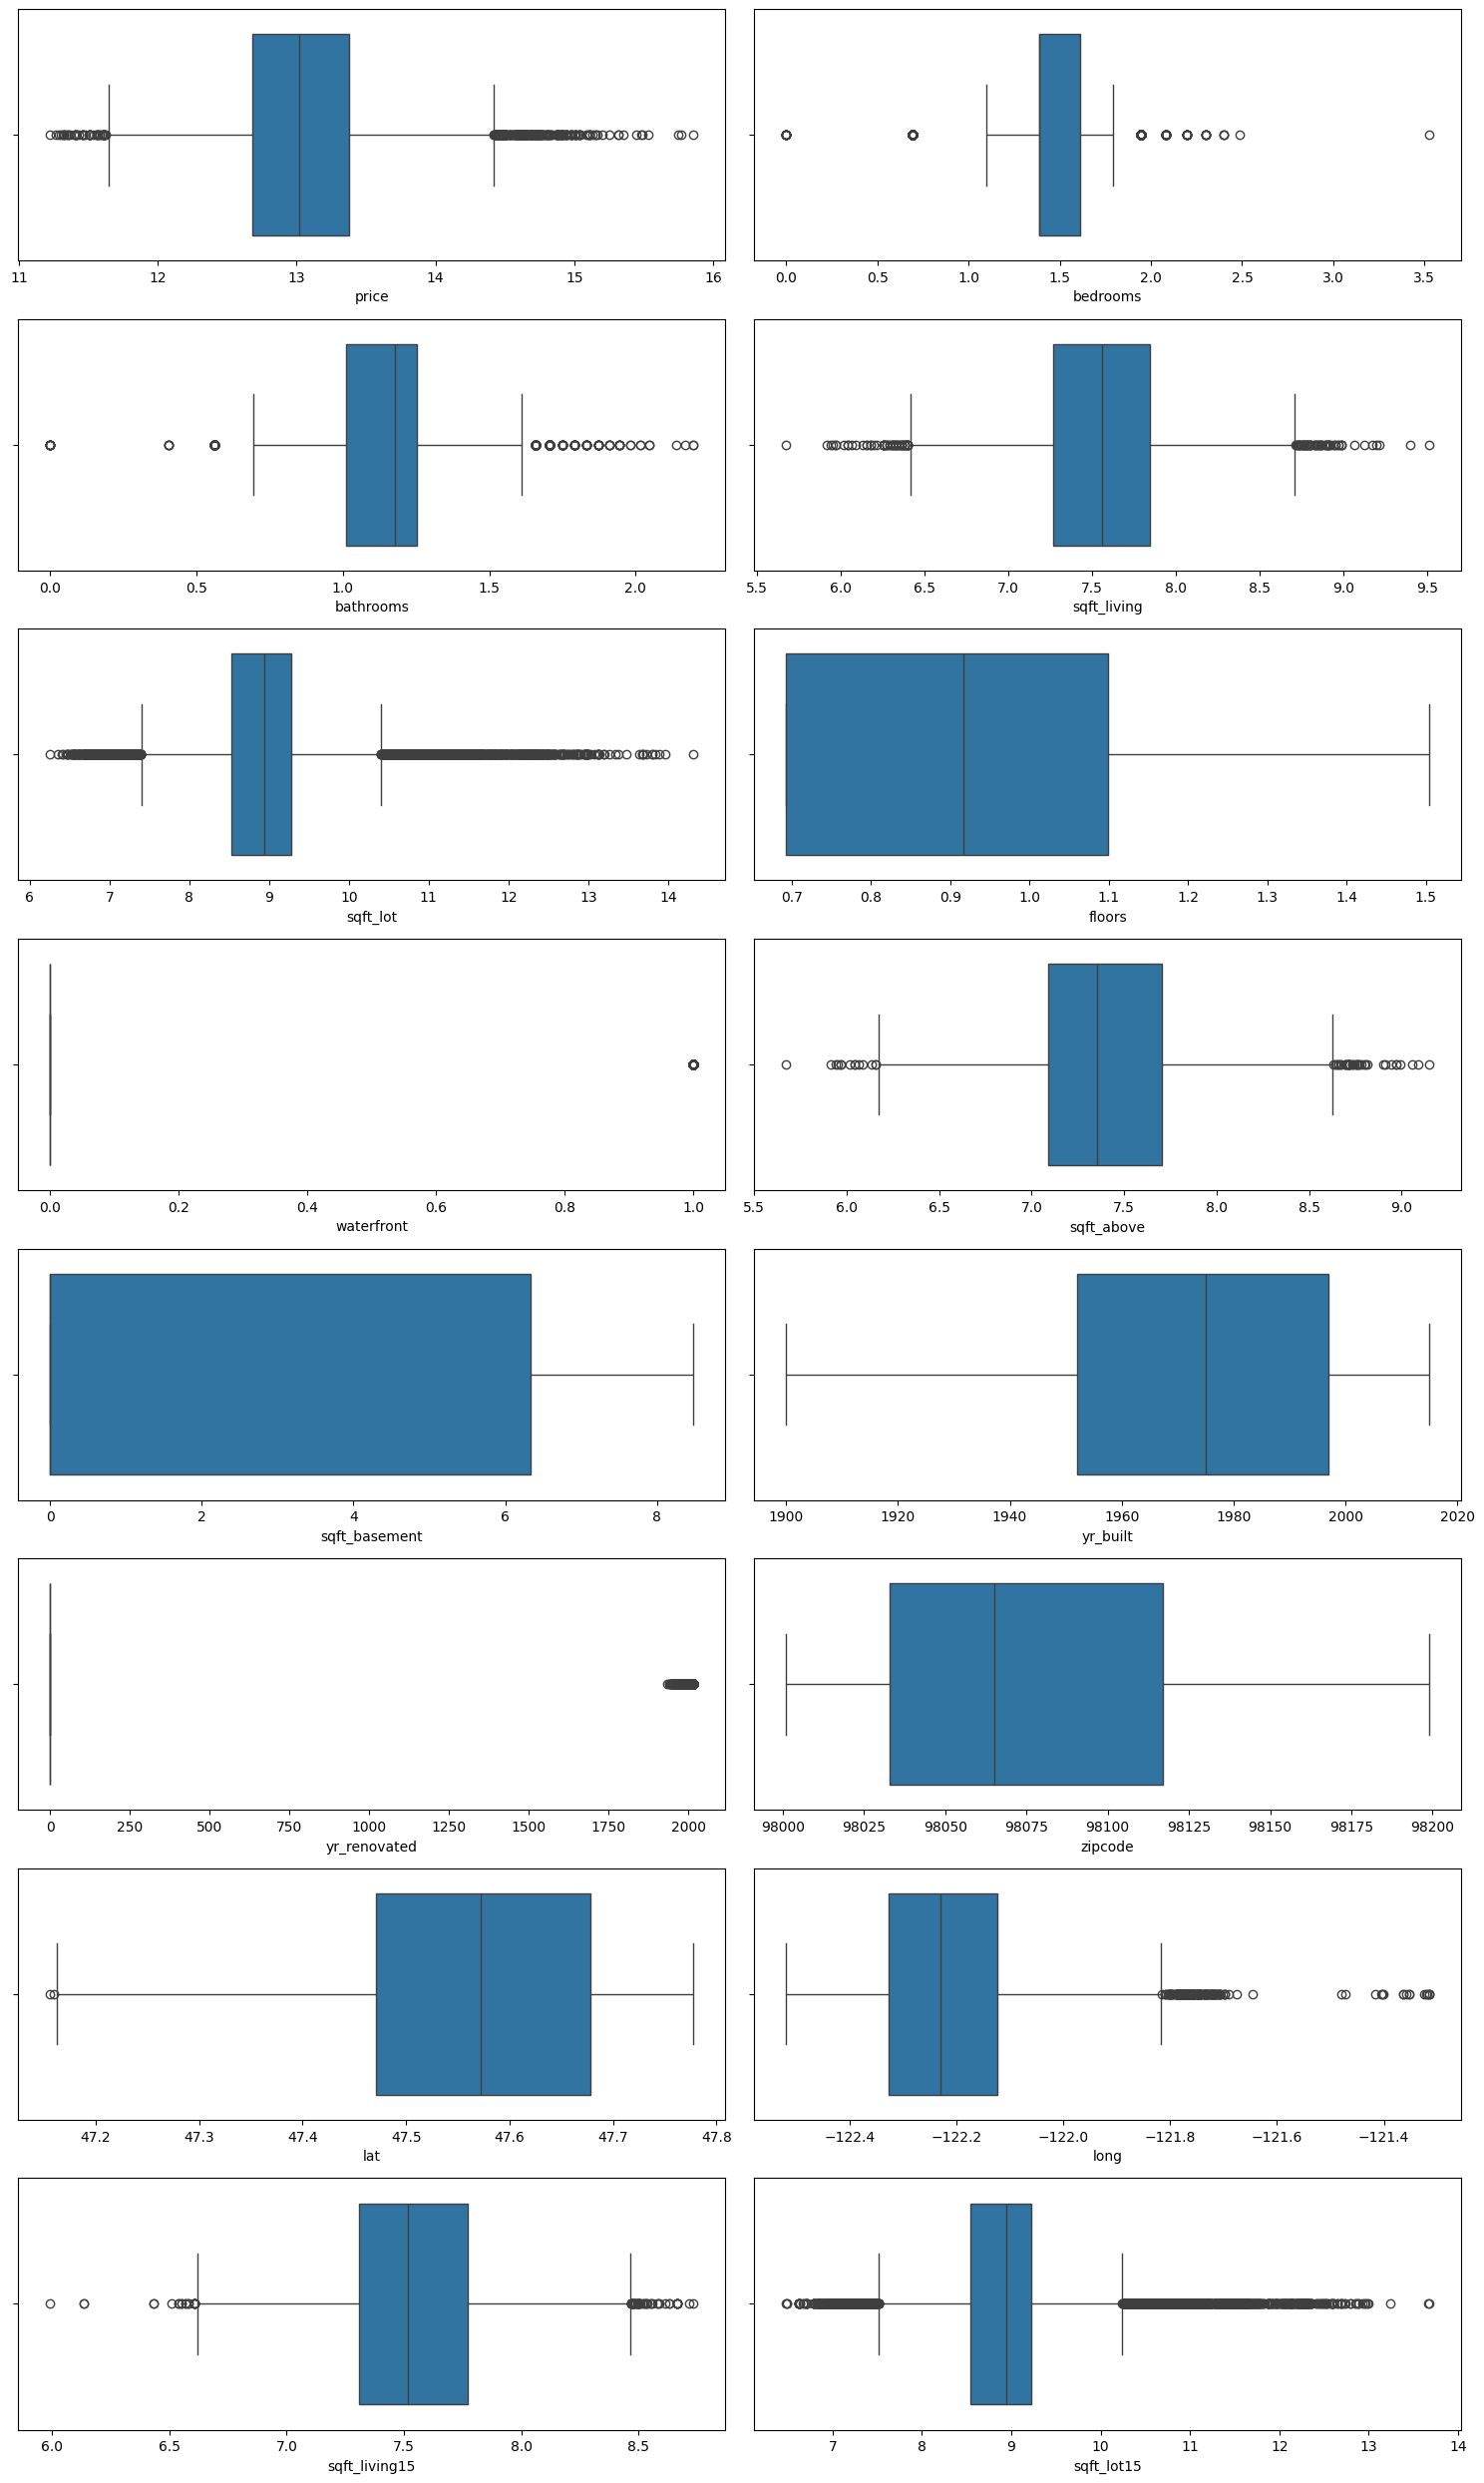

In [14]:
fig, axes = plt.subplots(8, 2, figsize=(15,25))
for i, ax in enumerate(axes.flat):
    sns.boxplot(x=data[data_num_cols[i]], ax=ax)

plt.tight_layout()
plt.show()

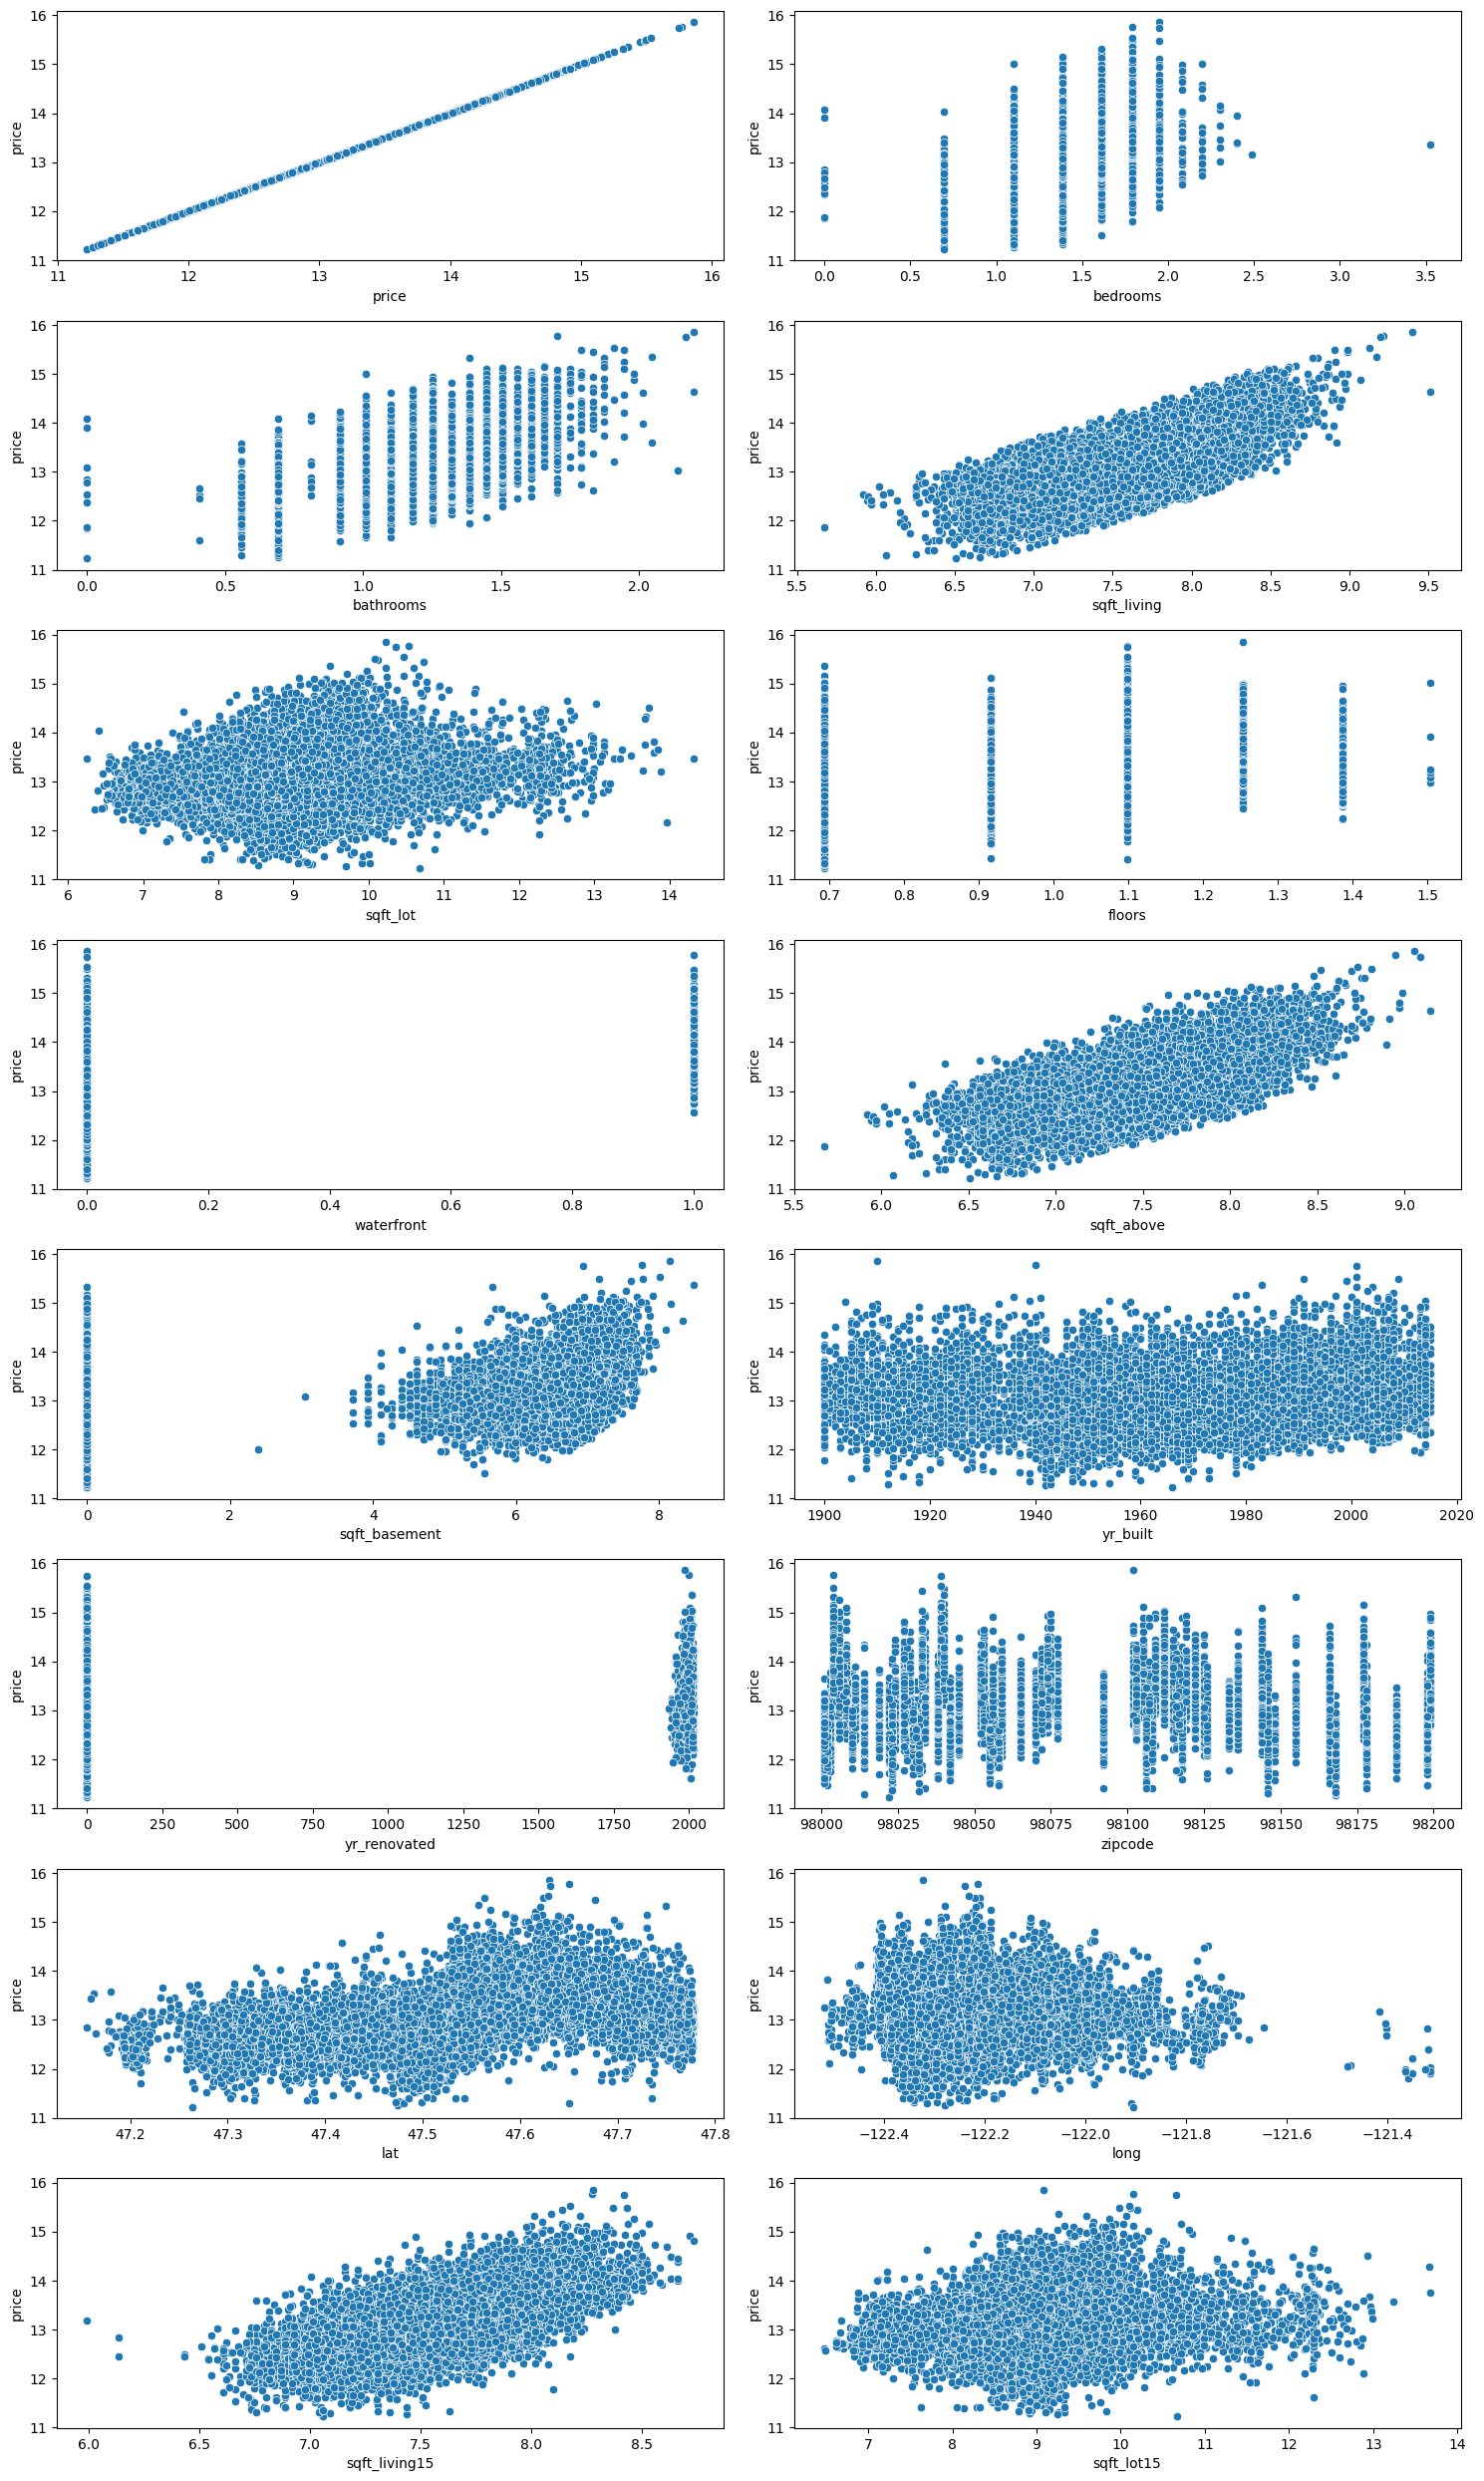

In [15]:
fig, axes = plt.subplots(8, 2, figsize=(15,25))
for i, ax in enumerate(axes.flat):
    sns.scatterplot(x=data[data_num_cols[i]], y=data['price'], ax=ax)

plt.tight_layout()
plt.show()

In [16]:
data.sort_values(by='sqft_living15', ascending=True)[:3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
13441,2722059275,20150512T000000,13.191891,1.386294,1.321756,7.736744,10.450134,1.098612,0,7.736744,...,False,False,False,True,False,False,False,False,False,False
17286,9421500130,20140616T000000,12.842652,1.791759,1.252763,7.923348,8.989195,0.693147,0,7.378384,...,False,False,False,False,True,False,False,False,False,False
12106,3822200036,20140624T000000,12.458779,1.098612,1.098612,7.074117,9.134107,0.693147,0,7.074117,...,False,False,False,True,False,False,False,False,False,False


In [17]:
data.drop(data.index[[13441, 17286, 12106]], inplace=True)

In [18]:
data.sort_values(by='bedrooms', ascending=False)[:3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
15870,2402100895,20140625T000000,13.369225,3.526361,1.011601,7.390799,8.699681,0.693147,0,6.947937,...,False,False,False,True,False,False,False,False,False,False
8757,1773100755,20140821T000000,13.161586,2.484907,1.386294,8.006701,8.509363,1.098612,0,7.783641,...,False,False,False,True,False,False,False,False,False,False
19254,8812401450,20141229T000000,13.399997,2.397895,1.386294,7.979681,8.228444,1.098612,0,7.528869,...,False,False,False,True,False,False,False,False,False,False


In [19]:
data.drop(data.index[[15870]], inplace=True)

# 3. Linear Regression Models


Split data  

In [24]:
X = data.drop(['price', 'date'], axis=1)
y = data['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Linear Regression

In [26]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [27]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.7801497330694429
0.7646953534571013


Polynomial Regression

In [36]:
pipe2 = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

param_grid = {
    "polynomial__degree": [1,2]
}

search = GridSearchCV(pipe2, param_grid, n_jobs=2)
search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=2, param_grid={'polynomial__degree': [1, 2]})

In [38]:
print(search.score(X_train, y_train))
print(search.score(X_test, y_test))

0.7801497330694429
0.7646953534571013


Elastic Net

In [ ]:
pipe3 = Pipeline([
    ('polynomial', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

param_grid2 = {
    "polynomial__degree": [1,2],
    "model__alpha": [1, 0.5]
}

search2 = GridSearchCV(pipe3, param_grid2, n_jobs=2)
search2.fit(X_train, y_train)
search2

GridSearchCV(estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('model', ElasticNet())]),
             n_jobs=2,
             param_grid={'model__alpha': [0.1, 0.3, 0.5],
                         'model__l1_ratio': [0.1, 0.5, 0.9],
                         'polynomial__degree': [1, 2]})

In [41]:
print(search2.score(X_train, y_train))
print(search2.score(X_test, y_test))

0.7707262485166886
0.7588648521194533


# 4. Insights and key findings


# 5. Next Steps


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
